# *** Import Libraries ***

In [101]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns #for confusion matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from scipy.special import expit
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

## 1. Import Data Set (1 Points)

In [60]:
kidneyDiseaseData=pd.read_csv('./data/kidney_disease.csv')

In [61]:
kidneyDiseaseData.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [62]:
kidneyDiseaseData.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


### 1.2 Check the unique coloumn value for each column and pre process the data accordingly 

In [63]:
for col in kidneyDiseaseData:
    print(col," : ",kidneyDiseaseData[col].unique())

id  :  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244

### 1.3 Cleaning and Processing data to make it suitable for the training

In [64]:
kidneyDiseaseData.replace(regex=True,inplace=True,to_replace=r'\t',value=r'')

In [65]:
kidneyDiseaseData=kidneyDiseaseData.apply(lambda x: x.str.strip() if x.dtype == "object" else x )

In [66]:
### Map text class to 1/0 and do some cleaning 
kidneyDiseaseData[['htn','dm','cad','pe','ane']] = kidneyDiseaseData[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
kidneyDiseaseData[['rbc','pc']] = kidneyDiseaseData[['rbc','pc']].replace(to_replace={'normal':1,'abnormal':0})
kidneyDiseaseData[['pcc','ba']] = kidneyDiseaseData[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
kidneyDiseaseData[['appet']] = kidneyDiseaseData[['appet']].replace(to_replace={'good':1,'poor':0})
kidneyDiseaseData['classification'] = kidneyDiseaseData['classification'].replace(to_replace={'ckd':1,'notckd':0})

### 1.4 Data Filtering
According to the question, they didn't ask to work on missing data, so we will not be focusing on the missing data part
will directly drop all the  values which has null value 

In [67]:
filteredKidneyDiseaseData=kidneyDiseaseData.dropna(axis=0)

In [68]:
filteredKidneyDiseaseData=filteredKidneyDiseaseData.reset_index(drop=True)

In [69]:
filteredKidneyDiseaseData.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc               float64
pc                float64
pcc               float64
ba                float64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn               float64
dm                float64
cad               float64
appet             float64
pe                float64
ane               float64
classification      int64
dtype: object

In [70]:
filteredKidneyDiseaseData.pcv=filteredKidneyDiseaseData.pcv.astype(int)
filteredKidneyDiseaseData.wc=filteredKidneyDiseaseData.wc.astype(int)
filteredKidneyDiseaseData.rc=filteredKidneyDiseaseData.rc.astype(float)

In [71]:
filteredKidneyDiseaseData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 26 columns):
id                158 non-null int64
age               158 non-null float64
bp                158 non-null float64
sg                158 non-null float64
al                158 non-null float64
su                158 non-null float64
rbc               158 non-null float64
pc                158 non-null float64
pcc               158 non-null float64
ba                158 non-null float64
bgr               158 non-null float64
bu                158 non-null float64
sc                158 non-null float64
sod               158 non-null float64
pot               158 non-null float64
hemo              158 non-null float64
pcv               158 non-null int32
wc                158 non-null int32
rc                158 non-null float64
htn               158 non-null float64
dm                158 non-null float64
cad               158 non-null float64
appet             158 non-null float64
pe  

## 2. Extract X as all Columns except the first column and Y as last column (1 points)

In [72]:
filteredKidneyDiseaseData.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,...,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
1,9,53.0,90.0,1.020,2.0,0.0,0.0,0.0,1.0,0.0,...,29,12100,3.7,1.0,1.0,0.0,0.0,0.0,1.0,1
2,11,63.0,70.0,1.010,3.0,0.0,0.0,0.0,1.0,0.0,...,32,4500,3.8,1.0,1.0,0.0,0.0,1.0,0.0,1
3,14,68.0,80.0,1.010,3.0,2.0,1.0,0.0,1.0,1.0,...,16,11000,2.6,1.0,1.0,1.0,0.0,1.0,0.0,1
4,20,61.0,80.0,1.015,2.0,0.0,0.0,0.0,0.0,0.0,...,24,9200,3.2,1.0,1.0,1.0,0.0,1.0,1.0,1


In [73]:
X=filteredKidneyDiseaseData[filteredKidneyDiseaseData.columns[1:25]]
Y=filteredKidneyDiseaseData[filteredKidneyDiseaseData.columns[25:26]]

# 3. Visualize the Data (2 Points)

### 3.1 Visualize the correlation of the parameters using Heatmap

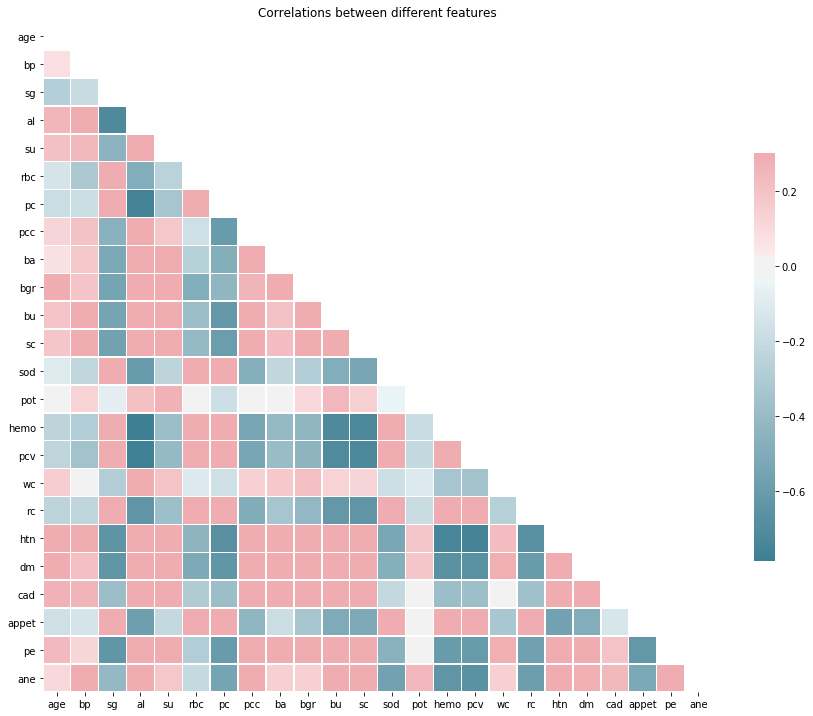

In [74]:
corr_df = X.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_df, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlations between different features')
plt.show()

As we can see from the above graph, that the correlation value is ranging from <b>0.0</b> to <b>0.9</b>. So for more feature visualization we can neglect the feature with correlation greater than or equal to <b>0.85</b>

In [75]:
columns = np.full((corr_df.shape[0],), True, dtype=bool)
for i in range(corr_df.shape[0]):
    for j in range(i+1, corr_df.shape[0]):
        if corr_df.iloc[i,j] >= 0.85:
            if columns[j]:
                columns[j] = False
selected_columns = X.columns[columns]
X_without_corr = X[selected_columns]

### 3.3 Graph between 'age' and 'bp' w.r.t disease classification and 'pc'

C:\anaconda3\envs\python3.7\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 600x400 with 0 Axes>

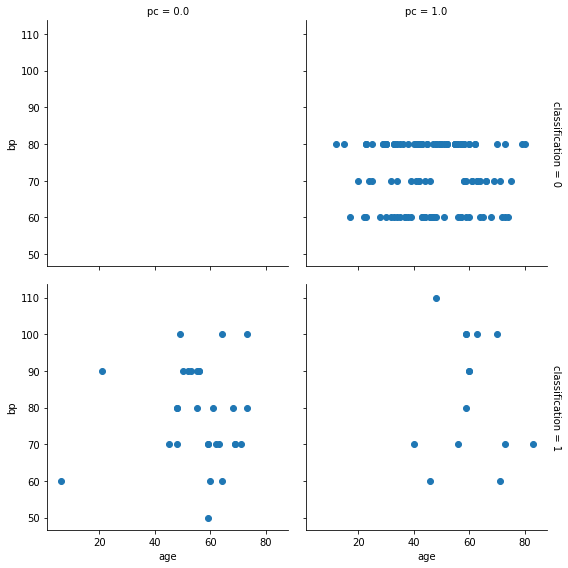

In [76]:
plt.figure(dpi=100)
g=sns.FacetGrid(filteredKidneyDiseaseData,row='classification',col='pc',margin_titles=True,size=4)
g.map(plt.scatter,'age','bp')

We can clearly see that when age is in between 25 to 80, bp is in between 60 to 110 and if pc is abnormal then there is not a single person who have survived CKD.

### 3.4 Graph between 'age' and 'bp' w.r.t disease classification and 'pcc'

C:\anaconda3\envs\python3.7\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 600x400 with 0 Axes>

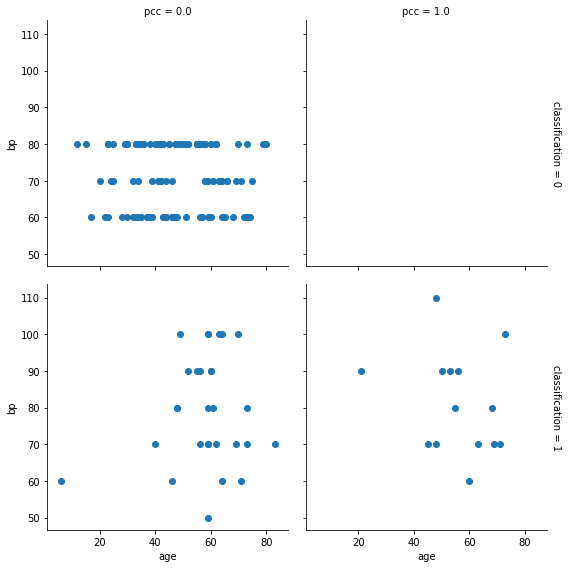

In [77]:
plt.figure(dpi=100)
g=sns.FacetGrid(filteredKidneyDiseaseData,row='classification',col='pcc',margin_titles=True,size=4)
g.map(plt.scatter,'age','bp')

We can clearly see that when age is in between 40 to 80, bp is in between 60 to 120 and if pcc is present then there is not a single person who have survived CKD.

### 3.5 Graph between 'age' and 'bp' w.r.t disease classification and 'ba'

C:\anaconda3\envs\python3.7\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 600x400 with 0 Axes>

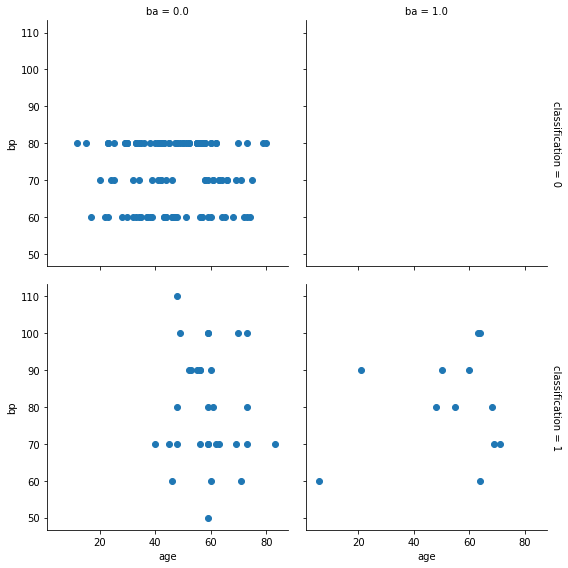

In [78]:
plt.figure(dpi=100)
g=sns.FacetGrid(filteredKidneyDiseaseData,row='classification',col='ba',margin_titles=True,size=4)
g.map(plt.scatter,'age','bp')

We can clearly see that when age is in between 40 to 80, bp is in between 60 to 110 and if ba is present then there is not a single person who have survived CKD.

### 3.6 Graph between 'age' and 'bp' w.r.t disease classification and 'htn'

C:\anaconda3\envs\python3.7\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 600x400 with 0 Axes>

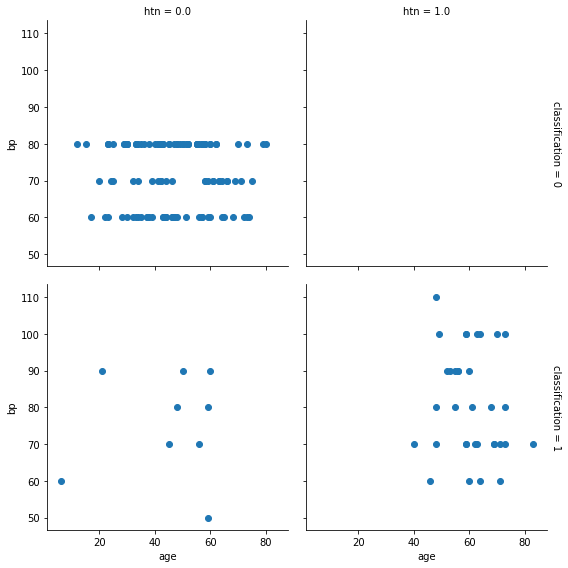

In [79]:
plt.figure(dpi=100)
g=sns.FacetGrid(filteredKidneyDiseaseData,row='classification',col='htn',margin_titles=True,size=4)
g.map(plt.scatter,'age','bp')

We can clearly see that when age is in between 35 to 80, bp is in between 60 to 120 and if htn is yes then there is not a single person who have survived CKD.

### 3.7 Graph between 'age' and 'bp' w.r.t disease classification and 'gm'

C:\anaconda3\envs\python3.7\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 600x400 with 0 Axes>

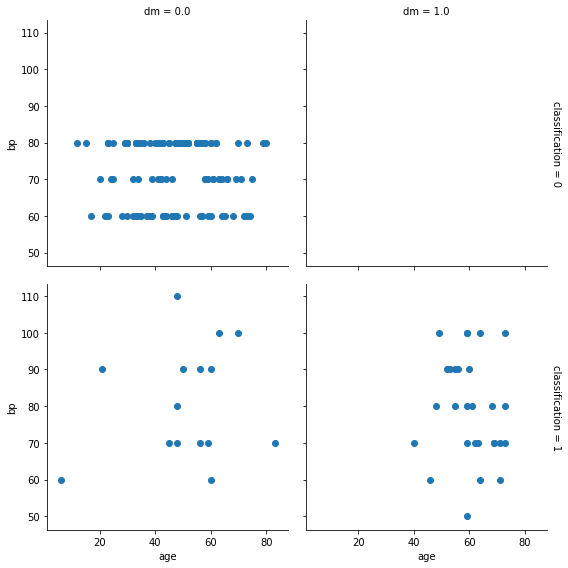

In [80]:
plt.figure(dpi=100)
g=sns.FacetGrid(filteredKidneyDiseaseData,row='classification',col='dm',margin_titles=True,size=4)
g.map(plt.scatter,'age','bp')

We can clearly see that when age is in between 20 to 80, bp is in between 60 to 120 and if dm is yes then there is not a single person who have survived CKD.

# 4. Spilliting the data into training set and testing set (1 point)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state=323,stratify= Y)

In [82]:
print(X_train.shape)
print(X_test.shape)

(110, 24)
(48, 24)


# 4.0 Perform 10-fold cross validation (1 Point)

In [83]:
lr = LogisticRegressionCV(Cs=1,max_iter=100,solver='liblinear',class_weight=None,scoring='f1',random_state=323,cv=10)

# 5. Train a logistic regression model for the dataset (2 Points)

In [84]:
lr.fit(X_train, y_train)

C:\Users\chib\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV(Cs=1, class_weight=None, cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=323, refit=True, scoring='f1',
                     solver='liblinear', tol=0.0001, verbose=0)

In [85]:
# Helper function to plot the ROC curve
def auc_scorer(clf, X, y, model): 
    if model=='RF':
        fpr, tpr, _ = roc_curve(y, clf.predict_proba(X)[:,1])
    elif model=='SVM':
        fpr, tpr, _ = roc_curve(y, clf.decision_function(X))
    roc_auc = auc(fpr, tpr)

    plt.figure()    # Plot the ROC curve
    plt.plot(fpr, tpr, label='ROC curve from '+model+' model (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr,roc_auc

# 6. Display the coefficients and form the logistic regression equation

In [86]:
### The coefficients value of logistic model
print(lr.coef_)

[[-0.00138475 -0.00641296 -0.00017249  0.00234727  0.00042903 -0.00047131
  -0.00064851  0.00019823  0.00023777  0.01324939  0.02054754  0.00239543
  -0.0308621  -0.00016347 -0.00606702 -0.01858142  0.00021269 -0.00204699
   0.00054081  0.00033757  0.00010546 -0.00043611  0.00028637  0.00024795]]


In [87]:
X_test_predict=lr.predict_proba(X_test)

In [88]:
X_test_predict.shape

(48, 2)

In [89]:
df = pd.DataFrame({'x': X_test_predict[:,0], 'y': y_test['classification'].tolist()})

In [90]:
df = df.sort_values(by='x')

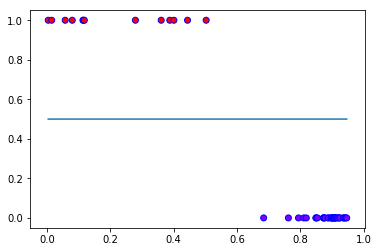

In [91]:
sigmoid_function = expit(df['x'] * lr.coef_[0][20] + lr.intercept_[0]).ravel()
plt.plot(df['x'], sigmoid_function)
plt.scatter(df['x'], df['y'], c=df['y'], cmap='rainbow', edgecolors='b')

# 7. Compute the accuracy and confusion matrix (1 Point)

 ********************************** Train Results Start Here ********************************** 

Detailed classification report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        80
           1       1.00      0.83      0.91        30

    accuracy                           0.95       110
   macro avg       0.97      0.92      0.94       110
weighted avg       0.96      0.95      0.95       110

Confusion Matrix:
[[80  0]
 [ 5 25]]
The Accuracy Score is 95.0  %


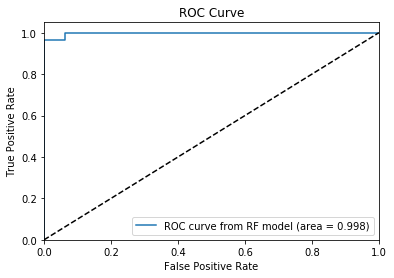


 ********************************** Test Results Start Here ********************************** 

Detailed classification report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        35
           1       1.00      0.92      0.96        13

    accuracy                           0.98        48
   macro avg       0.99      0.96      0.97        48
weighted avg       0.98      0.98      0.98        48

Confusion Matrix:
[[35  0]
 [ 1 12]]
The Accuracy Score is 98.0  %


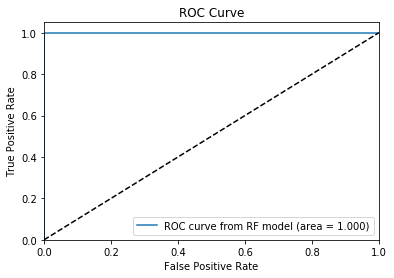

In [93]:

print(" ********************************** Train Results Start Here ********************************** \n")



print("Detailed classification report:")
y_true, lr_pred = y_train, lr.predict(X_train)
print(classification_report(y_true, lr_pred))

confusion = confusion_matrix(y_train, lr_pred)
print('Confusion Matrix:')
print(confusion)

accuracyScore=accuracy_score(y_true, lr_pred, normalize=True)
print("The Accuracy Score is",str(round(accuracyScore*100,0))," %")

# Determine the false positive and true positive rates
fpr,tpr,roc_auc = auc_scorer(lr, X_train, y_train, 'RF')

print("\n ********************************** Test Results Start Here ********************************** \n")

print("Detailed classification report:")
y_true, lr_pred = y_test, lr.predict(X_test)
print(classification_report(y_true, lr_pred))

confusion = confusion_matrix(y_test, lr_pred)
print('Confusion Matrix:')
print(confusion)

accuracyScore=accuracy_score(y_true, lr_pred, normalize=True)
print("The Accuracy Score is",str(round(accuracyScore*100,0))," %")

# Determine the false positive and true positive rates
fpr,tpr,roc_auc = auc_scorer(lr, X_test, y_test, 'RF')

# 8. Plot the decision boundary
for a decision boundaries we will train the model Random Forest Model to get the important features from the data and then take two top important features to create the decision boundaries

In [124]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train['classification'].values)
print(clf.score(X_train,y_train))
names = X_train.columns
print("Features in sorted order")
print(sorted(zip(map(lambda x: round(x, 4), clf.feature_importances_), names),reverse=True))

1.0
Features in sorted order
[(0.2027, 'al'), (0.1624, 'pcv'), (0.1531, 'sc'), (0.1098, 'hemo'), (0.099, 'rc'), (0.0677, 'sg'), (0.0426, 'bu'), (0.0308, 'htn'), (0.0299, 'pc'), (0.0278, 'sod'), (0.0255, 'bgr'), (0.0101, 'dm'), (0.0096, 'pe'), (0.0066, 'ane'), (0.0062, 'wc'), (0.0059, 'su'), (0.0022, 'rbc'), (0.0022, 'cad'), (0.002, 'ba'), (0.0017, 'appet'), (0.0013, 'age'), (0.0005, 'bp'), (0.0004, 'pcc'), (0.0, 'pot')]


In [128]:
X_train_sample=X_train[['al','sc']].values
y_train_sample=y_train['classification'].values

X_test_sample=X_test[['al','sc']].values
y_test_sample=y_test['classification'].values

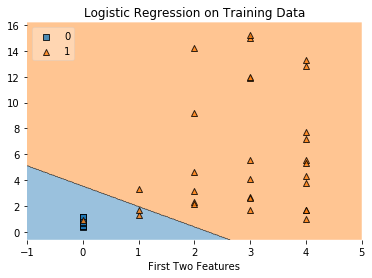

In [129]:
logModel=LogisticRegression()
logModel.fit(X_train_sample,y_train_sample)
plot_decision_regions(X_train_sample,y_train_sample, clf=logModel, legend=2)
plt.xlabel('First Two Features')
plt.title('Logistic Regression on Training Data')
plt.show()

In [130]:
print(np.std(X_train.values, 0)*lr.coef_)

[[-2.21692518e-02 -7.05617965e-02 -9.37054246e-07  3.29503158e-03
   2.97135213e-04 -1.46932738e-04 -2.45143675e-04  5.43316515e-05
   5.80397472e-05  8.19941899e-01  1.04893188e+00  7.92795072e-03
  -2.32003160e-01 -6.73608813e-04 -1.79905491e-02 -1.73760644e-01
   6.47973246e-01 -2.07480872e-03  2.16324033e-04  1.24883689e-04
   2.57431649e-05 -1.45345202e-04  9.24454431e-05  7.43851562e-05]]


# 9. Create an output .csv file consisting actual Test set values of Y (column name: Actual) and Predictions of Y(column name: Predicted). (1 points)

In [ ]:
results=pd.DataFrame({'Actual':y_test['classification'].tolist(),'Predicted':lr_pred})

In [ ]:
results.to_csv('result/output.csv',index=False)